In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

In [2]:
o1 = pd.read_excel('order_1.xlsx')
o2 = pd.read_excel('order_2.xlsx')
o1['order']=1

400


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


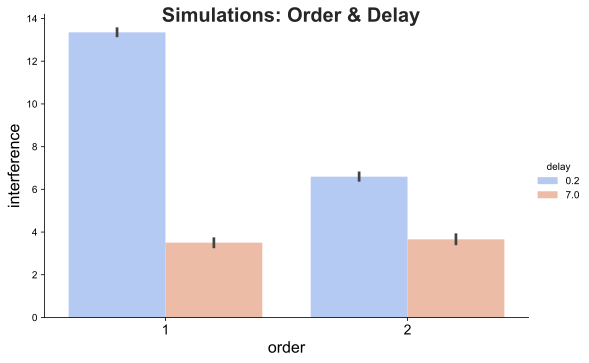

                            OLS Regression Results                            
Dep. Variable:           interference   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     630.5
Date:                Tue, 14 Apr 2020   Prob (F-statistic):          2.25e-150
Time:                        14:13:25   Log-Likelihood:                -808.42
No. Observations:                 400   AIC:                             1625.
Df Residuals:                     396   BIC:                             1641.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      20.6047      0.423     48.757      

In [3]:
df=pd.concat([o1, o2], ignore_index=True)
print(len(df))

g = sns.factorplot(x="order", y="interference", hue='delay', ci=69, data=df,
                   kind='bar', palette='coolwarm', aspect=1.5)


sns.set_style('white')
plt.xlabel('order', fontsize=16)
plt.ylabel('interference', fontsize=16)
plt.xticks([0, 1], ['1', '2'], fontsize=14)

g.fig.suptitle('Simulations: Order & Delay', fontsize=20, x=0.5, weight='demibold')


plt.show(block=False)


import statsmodels.formula.api as smf
result = smf.ols(formula="interference ~ delay*order ", data=df).fit()
print(result.summary())

In [6]:
def adjust_spines(ax, spines):  ### aesthetics, offset axies 
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 20))  # outward by 10 points
            ### spine.set_smart_bounds(True) ##comment if you want to be free to set the ylims by your own
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'simulated close: SOA & order')

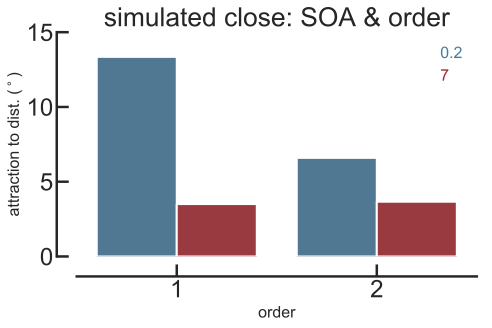

In [12]:
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")


col_02 = '#457b9d'
col_7 = '#a82a33'
palette=[col_02, col_7]

g = sns.factorplot(x="order", y="interference", hue='delay', ci=None, data=df,
                   kind='bar', palette=[col_02, col_7], aspect=1.5, legend=False)


sns.set_style('white')
plt.xlabel('order', fontsize=16)
plt.ylabel('interference', fontsize=16)
plt.xticks([0, 1], ['1', '2'], fontsize=14)
plt.yticks([0, 5, 10, 15], fontsize=14)

plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
## Legend
l = plt.legend(loc=1, frameon=False, prop={'size': 16})
for i_h, h_idx in enumerate([0.2, 7]):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);

    
#
plt.ylabel(r'attraction to dist. ($^\circ$)');
plt.title('simulated close: SOA & order');

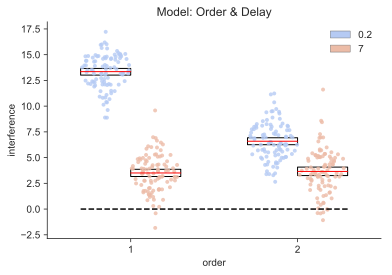

In [6]:
from matplotlib.patches import Rectangle
import scipy
import scikits.bootstrap as bootstraps
from seaborn_sinaplot import sinaplot
from matplotlib.patches import Rectangle
import numpy as np

   
    
def linares_plot(x, y, df, pallete, hue=None, order=None, hue_order=None, point_size=1, alpha=0.4, width=0.6 ):
    
    sinaplot.sinaplot(x=x, y=y, hue=hue, data=df, violin=False, point_size=point_size, palette=pallete,
                      alpha=alpha, order=order, hue_order=hue_order, width=width)
    if hue==None:
        for i_x, x_idx in enumerate(order):
            ci = df.groupby(x)[y].apply(lambda n:bootstraps.ci(data=n.values)).iloc[i_x]
            
            left = i_x - width/2 
            plt.gca().add_patch(Rectangle((left, ci[0]), width, ci[1]-ci[0],alpha=1, fill=False, linewidth=1,
                                          edgecolor='black'))
            m = df.loc[df[x]==x_idx, y].mean()
            plt.plot([left, left+width], [m,m ], 'r', linewidth=1)
    else:
        for i_x, x_idx in enumerate(order):
            for i_h, h_idx in enumerate(hue_order):
                ci = df.groupby(x).get_group(x_idx).groupby(hue)[y].apply(lambda n:bootstraps.ci(data=n.values)).iloc[i_h]
                if i_h==0:
                    bott_left = i_x - width/2
                else:
                    bott_left = i_x 
                 
                bar_length = width/2 # 0.6/len(df[hue].unique())
                plt.gca().add_patch(Rectangle((bott_left, ci[0]), bar_length , ci[1]-ci[0],
                                              alpha=1, fill=False, linewidth=1, edgecolor='black'))
                
                m = df.loc[(df[x]==x_idx) & (df[hue]==h_idx) , y].mean()                
                plt.plot( [bott_left, bott_left+bar_length], [m,m ], 'r', linewidth=1)
        
        plt.gca().legend(loc= 1, frameon=False)
        #
    plt.xticks(  np.arange(len(df[x].unique())) , order)
    plt.xlim(-0.5, len(df[x].unique())-0.5 )
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    
    

    
    
linares_plot(x='order', y='interference', hue='delay', df= df, pallete='coolwarm', 
              order=[1,2], hue_order=[0.2, 7], point_size=4, alpha=0.8, width=0.6 )  
#plt.ylim(-10,15)
plt.plot([-.3 ,1.3], [0,0], 'k--')
plt.title('Model: Order & Delay')
plt.show(block=False)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


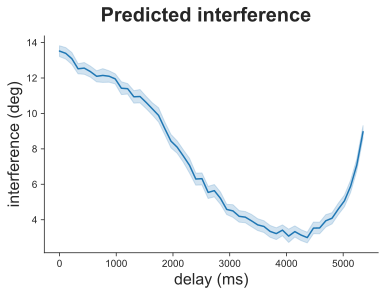

In [17]:
dfc = pd.read_excel('order_1_cont.xlsx')


## Continuous
fig = plt.figure()
fig.set_size_inches(6, 4)
fig.tight_layout()
fig.suptitle('Predicted interference', fontsize=20, x=0.5, weight='demibold')
ax1 = fig.add_subplot(111)
sns.lineplot(ax= ax1, x="delay", y="interference", data=dfc)
sns.set_style('white')
plt.xlabel('delay (ms)', fontsize=16)
plt.ylabel('interference (deg)', fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show(block=False)



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


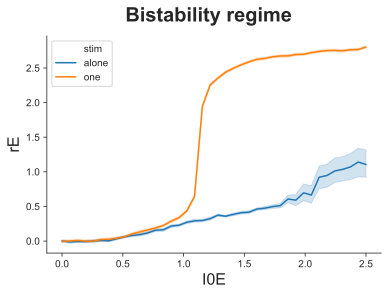

In [18]:
df_b =pd.read_excel('bistabilityt.xlsx')

## plot
fig = plt.figure()
fig.set_size_inches(6, 4)
fig.tight_layout()
fig.suptitle('Bistability regime', fontsize=20, x=0.5, weight='demibold')
ax1 = fig.add_subplot(111)
sns.lineplot(ax= ax1, x="I0E", y="rE", hue='stim', data=df_b)
sns.set_style('white')
plt.xlabel('I0E', fontsize=16)
plt.ylabel('rE', fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show(block=False)


